In [1]:
using Toms566
using BinDeps
using Optim

In [2]:
Pkg.add("PyPlot")
Pkg.build("PyPlot")

INFO: Nothing to be done
INFO: Building PyCall
INFO: PyCall is using /usr/bin/python (Python 2.7.6) at /usr/bin/python, libpython = libpython2.7


In [3]:
Pkg.update()

INFO: Updating METADATA...
INFO: Updating Toms566...
INFO: Computing changes...
INFO: No packages to install, update or remove


In [4]:
using PyPlot

INFO: Recompiling stale cache file /home/juser/.julia/lib/v0.4/PyCall.ji for module PyCall.
INFO: Recompiling stale cache file /home/juser/.julia/lib/v0.4/PyPlot.ji for module PyPlot.


In [73]:
###BFGS w/ Warmup###

function obj(x)
    return (p.obj(x),p.grd(x),p.hes(x))
end

function newtmin1(obj, x0, b, wrmUp, bfgs; maxIts = 1000, opTol = 1e-6)
    
    its = 0
    (f0,g0,h0) = obj(x0)
    x = x0
    (f,g,h) = obj(x)
    fvals = []
    ngvals = []
    
    while wrmUp > 0 && norm(g,2) > opTol*norm(g0) 
    
        (f,g,h) = obj(x)
        (sig, W) = eig(h)
        L = maximum(sig)
        x = x - (1/L)*g
        
        wrmUp = wrmUp - 1
        its = its + 1
        fvals = [fvals; f]
        ngvals = [ngvals; norm(g,2)]
        
    end
    
    if bfgs == false
        while norm(g,2) > b*norm(g0,2)*opTol && norm(g,2) > 1e-8 && its < maxIts 
            E = eigfact(h)
            V = E[:vectors]
            Lam = diagm(max(E[:values], 1e-2))
            d = -V*inv(Lam)*transpose(V)*g
        
            alpha = 1
            mu  = 1e-2
            (fp,gp,hp) = obj(x+alpha*d)
            while fp > f + alpha*mu*dot(g,d)
                alpha = alpha/2
                (fp,gp,hp) = obj(x+alpha*d)
            end
        
            x = x + alpha*d
            (f,g,h) = obj(x)
            fvals = [fvals; f]
            ngvals = [ngvals; norm(g,2)]
            its = its + 1
        end
        
    else
        j = length(x0)
        E = eigfact(h)
        V = E[:vectors]
        Lam = diagm(max(E[:values], 1e-2))
        H = inv(V*inv(Lam)*transpose(V))         # all (8 gets 0 wrmUp, others get 10 wrmUp)
        #H = eye(j)                              # all except 8
        
        while norm(g,2) > b*norm(g0,2)*opTol && norm(g,2) > opTol && its < maxIts
            d = -H*g
            alpha = 1
            mu1 = 1e-4
            mu2 = 0.9
            (fp,gp,hp) = obj(x+alpha*d)
            i=0
            while (i < 1000) && fp > f + alpha*mu1*dot(g,d) #|| abs(dot(d,gp)) > abs(mu2*dot(g,d))
                alpha = 0.5*alpha
                (fp,gp,hp) = obj(x+alpha*d)
                i = i+1
            end
            
            x1 = x
            x = x + alpha*d
            s = x-x1
            y = gp-g
            rho = 1/dot(y,s)
            H = (eye(j)-rho*s*transpose(y))*H*(eye(j)-rho*y*transpose(s))+rho*s*transpose(s)
            (f,g,h) = obj(x)
            ngvals = [ngvals; norm(g,2)]
            its = its + 1
        end
    end
            
            
    if norm(g,2) < opTol && its < maxIts
        println("Way 2 go, homeskillet. Norm of g = $(norm(g,2))" )
    else
        println("Aw, shucks")
    end
    
    return (x, ngvals, norm(g0,2), norm(g,2), its)
    
end

newtmin1 (generic function with 1 method)

Way 2 go, homeskillet. Norm of g = 9.615181531924055e-8


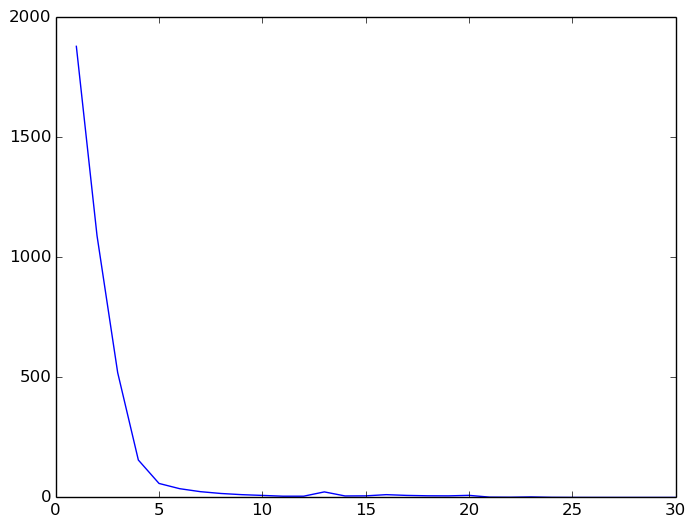

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fdf8bdd3410>

In [74]:
p = Problem(1)
x0 = p.x0
(x, ngvals, ng0, ng, its) = newtmin1(obj, x0, 1e-13, 10, true)
plot(1:size(ngvals,1),ngvals)

Way 2 go, homeskillet. Norm of g = 6.039001209848728e-7


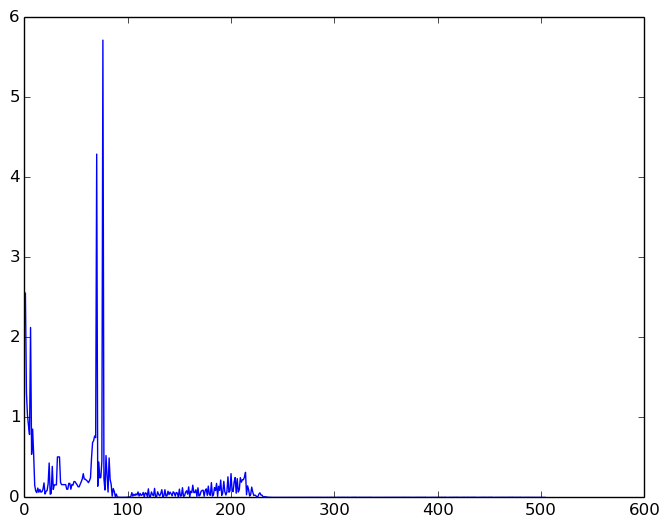

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fdf8bd61950>

In [75]:
p = Problem(2)
x0 = p.x0
(x, ngvals, ng0, ng, its) = newtmin1(obj, x0, 1e-13, 5, true)
plot(1:size(ngvals,1), ngvals)

Way 2 go, homeskillet. Norm of g = 2.6380973987170974e-10


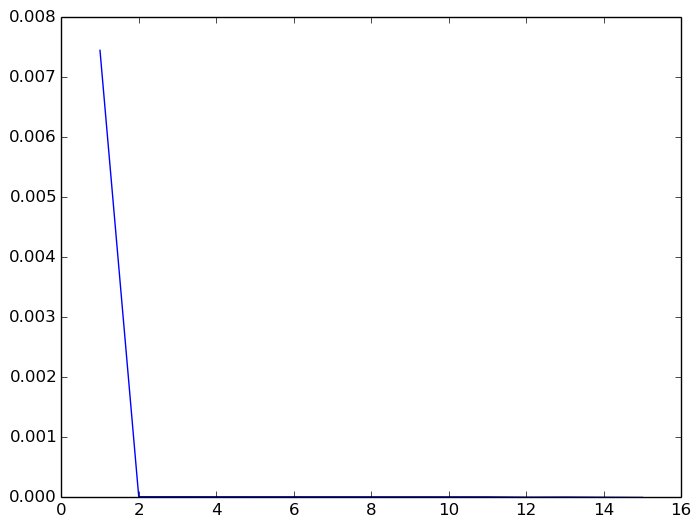

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fdf8bc99e10>

In [76]:
p = Problem(3)
x0 = p.x0
(x, ngvals, ng0, ng, its) = newtmin1(obj, x0, 1e-13, 10, true)
plot(1:size(ngvals,1), ngvals)

Way 2 go, homeskillet. Norm of g = 4.8970342010352944e-8


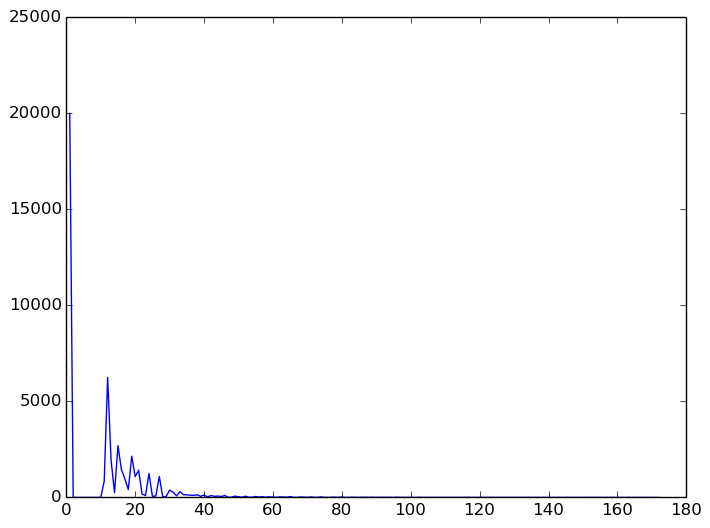

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fdf8bbe3c10>

In [77]:
p = Problem(4)
x0 = p.x0
(x, ngvals, ng0, ng, its) = newtmin1(obj, x0, 1e-13, 10, true)
plot(1:size(ngvals,1), ngvals)

Way 2 go, homeskillet. Norm of g = 8.656082378194483e-7


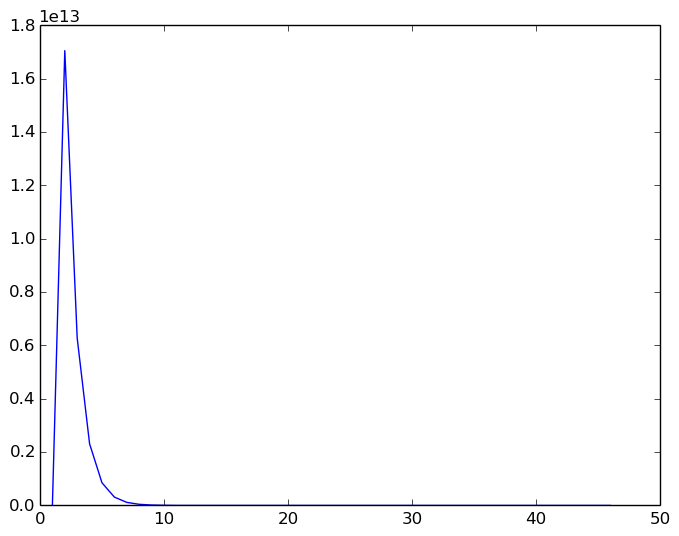

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fdf8bb1b7d0>

In [78]:
p = Problem(5)
x0 = p.x0
(x, ngvals, ng0, ng, its) = newtmin1(obj, x0, 1e-13, 10, true)
plot(1:size(ngvals,1), ngvals)

Way 2 go, homeskillet. Norm of g = 1.7751366110012248e-8


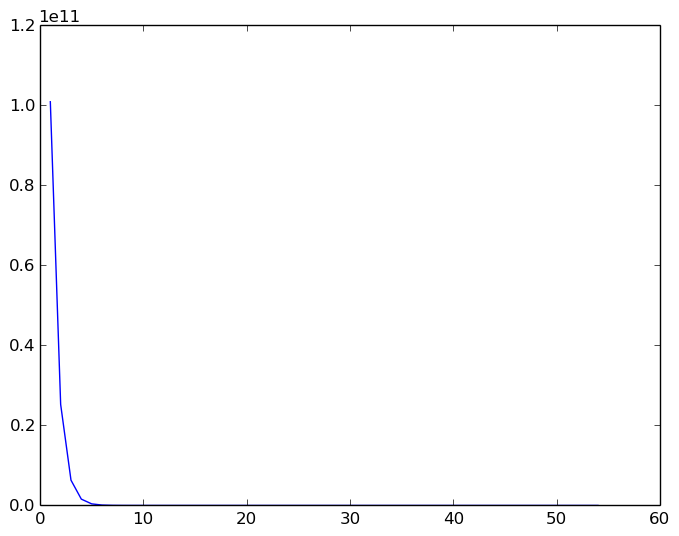

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fdf8ba52410>

In [79]:
p = Problem(6)
x0 = p.x0
(x, ngvals, ng0, ng, its) = newtmin1(obj, x0, 1e-13, 10, true)
plot(1:size(ngvals,1), ngvals)

Way 2 go, homeskillet. Norm of g = 6.909232134579673e-7


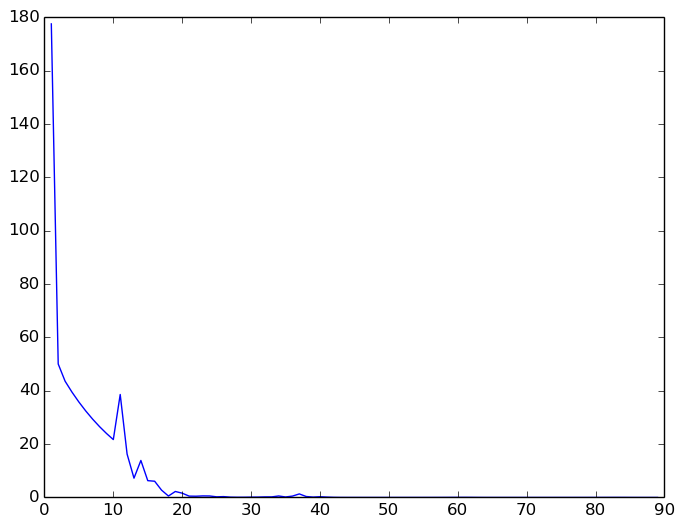

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fdf8b9f26d0>

In [80]:
p = Problem(7)
x0 = p.x0
(x, ngvals, ng0, ng, its) = newtmin1(obj, x0, 1e-13, 10, true)
plot(1:size(ngvals,1), ngvals)

Way 2 go, homeskillet. Norm of g = 5.911981795615468e-7


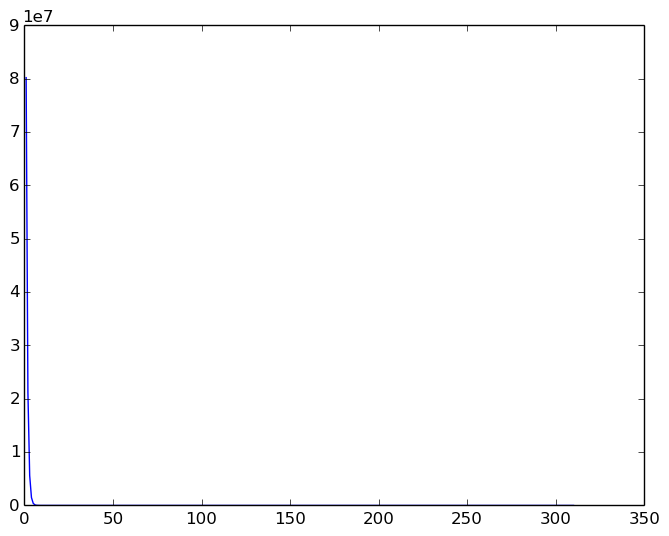

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fdf8b8d05d0>

In [81]:
p = Problem(8)
x0 = p.x0
(x, ngvals, ng0, ng, its) = newtmin1(obj, x0, 1e-13, 10, true)
plot(1:size(ngvals,1), ngvals)

Way 2 go, homeskillet. Norm of g = 9.963288647987722e-7


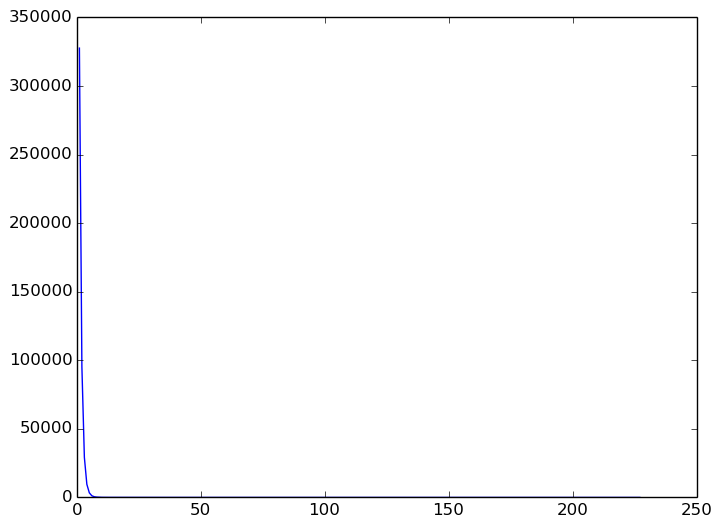

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fdf8b803e50>

In [82]:
p = Problem(9)
x0 = p.x0
(x, ngvals, ng0, ng, its) = newtmin1(obj, x0, 1e-13, 10, true)
plot(1:size(ngvals,1), ngvals)

Way 2 go, homeskillet. Norm of g = 5.329070518205834e-9


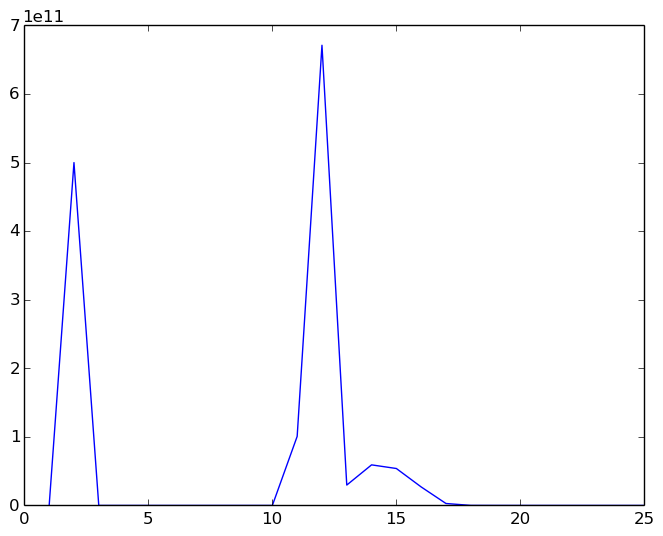

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fdf8b7a79d0>

In [83]:
p = Problem(10)
x0 = p.x0
(x, ngvals, ng0, ng, its) = newtmin1(obj, x0, 1e-13, 10, true)
plot(1:size(ngvals,1), ngvals)

Way 2 go, homeskillet. Norm of g = 1.1262676880504037e-7


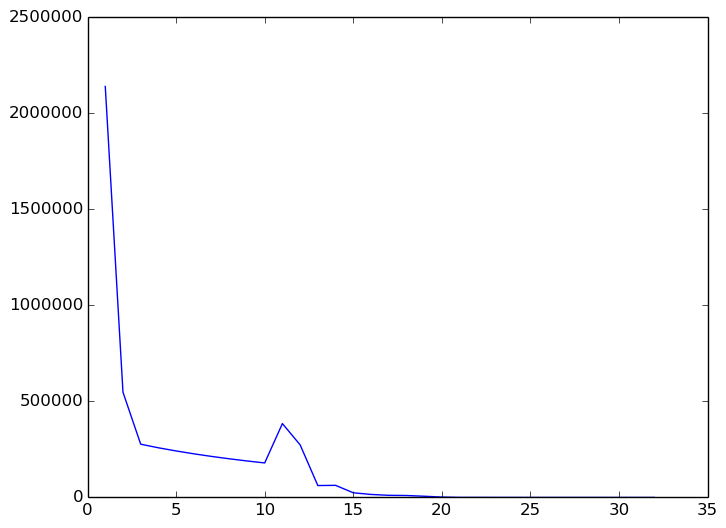

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fdf8b6e14d0>

In [84]:
p = Problem(11)
x0 = p.x0
(x, ngvals, ng0, ng, its) = newtmin1(obj, x0, 1e-13, 10, true)
plot(1:size(ngvals,1), ngvals)

Way 2 go, homeskillet. Norm of g = 4.031835563860223e-111


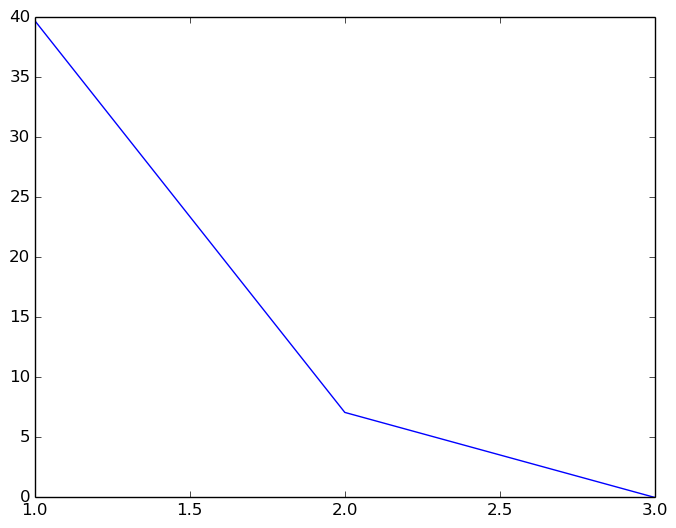

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fdf8b61a4d0>

In [85]:
p = Problem(12)
x0 = p.x0
(x, ngvals, ng0, ng, its) = newtmin1(obj, x0, 1e-13, 10, true)
plot(1:size(ngvals,1), ngvals)

Way 2 go, homeskillet. Norm of g = 4.783626375517633e-7


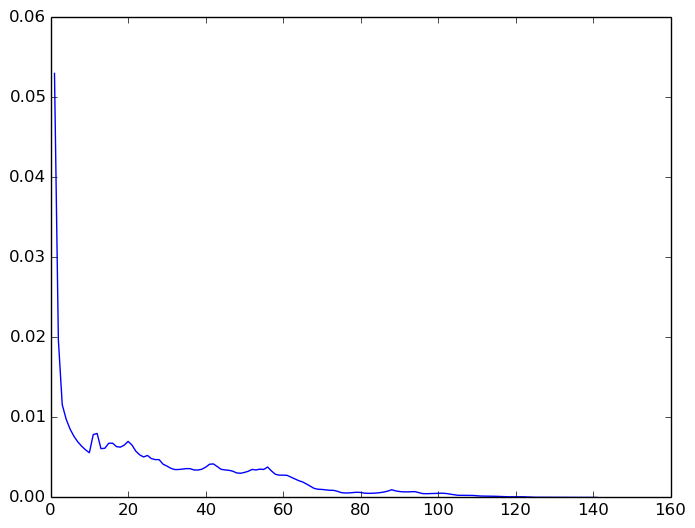

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fdf8b5bd250>

In [86]:
p = Problem(13)
x0 = p.x0
(x, ngvals, ng0, ng, its) = newtmin1(obj, x0, 1e-13, 10, true)
plot(1:size(ngvals,1), ngvals)

Way 2 go, homeskillet. Norm of g = 9.219927552112526e-7


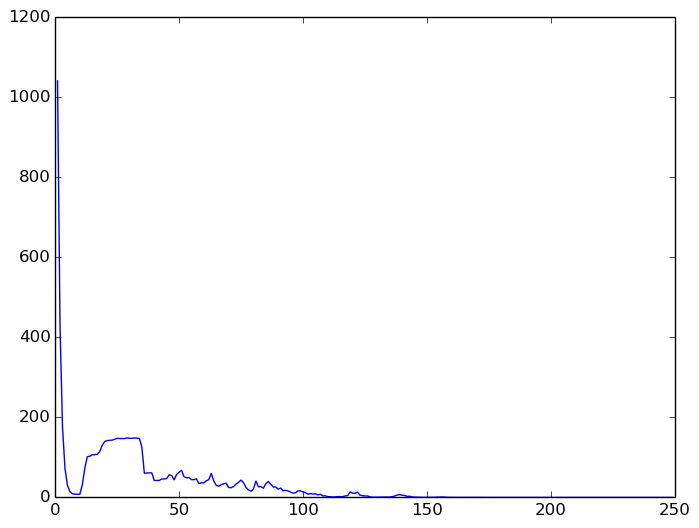

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fdf8b4f4990>

In [87]:
p = Problem(14)
x0 = p.x0
(x, ngvals, ng0, ng, its) = newtmin1(obj, x0, 1e-13, 10, true)
plot(1:size(ngvals,1), ngvals)

Way 2 go, homeskillet. Norm of g = 9.467636168690425e-7


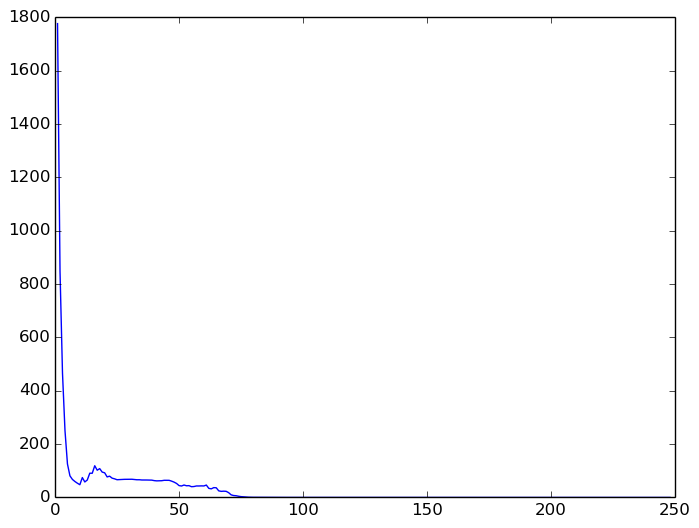

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fdf8b40ed90>

In [88]:
p = Problem(15)
x0 = p.x0
(x, ngvals, ng0, ng, its) = newtmin1(obj, x0, 1e-13, 10, true)
plot(1:size(ngvals,1), ngvals)

Way 2 go, homeskillet. Norm of g = 1.994771240471563e-11


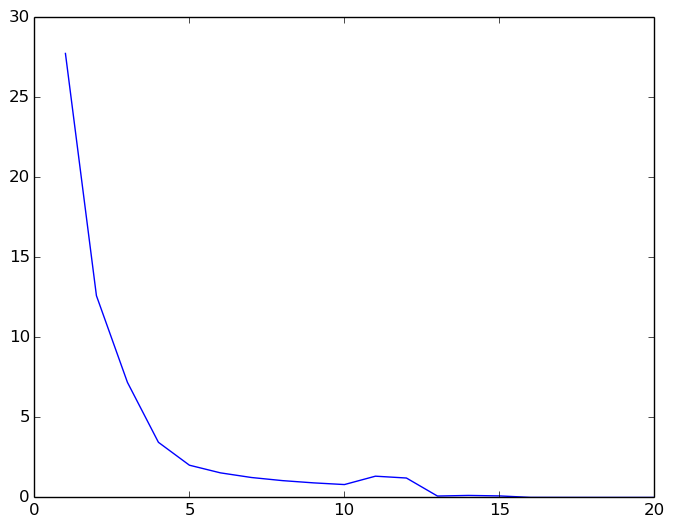

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fdf8b359150>

In [89]:
p = Problem(16)
x0 = p.x0
(x, ngvals, ng0, ng, its) = newtmin1(obj, x0, 1e-13, 10, true)
plot(1:size(ngvals,1), ngvals)

Way 2 go, homeskillet. Norm of g = 2.876412981718497e-7


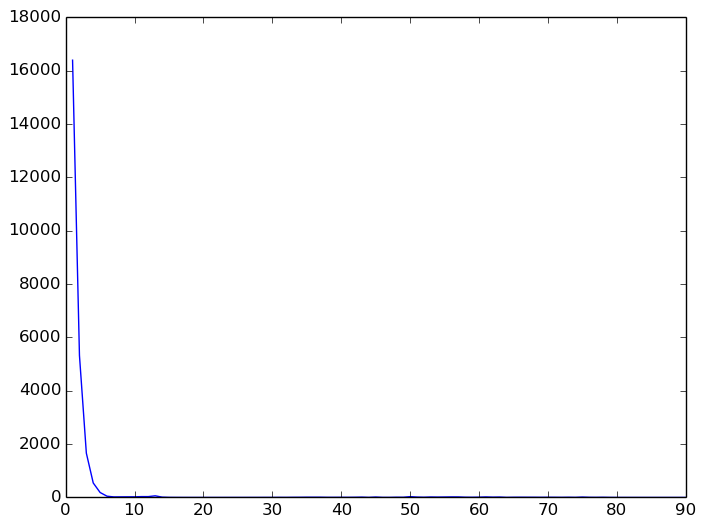

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fdf8b2f3690>

In [90]:
p = Problem(17)
x0 = p.x0
(x, ngvals, ng0, ng, its) = newtmin1(obj, x0, 1e-13, 10, true)
plot(1:size(ngvals,1), ngvals)

Way 2 go, homeskillet. Norm of g = 3.9447958076508863e-7


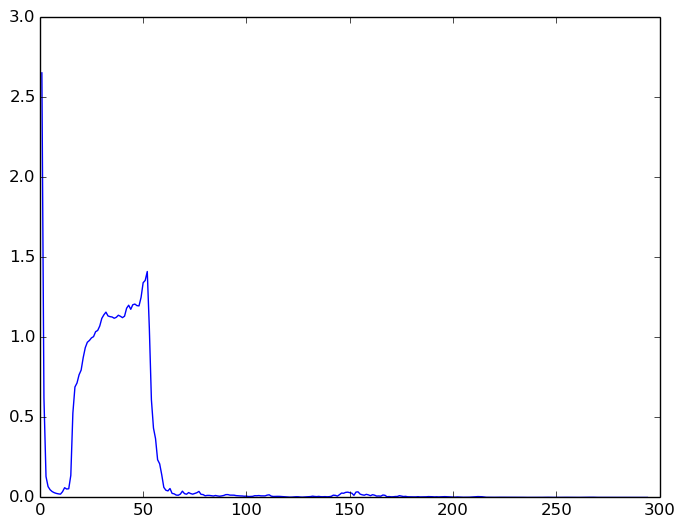

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fdf8b1d08d0>

In [91]:
p = Problem(18)
x0 = p.x0
(x, ngvals, ng0, ng, its) = newtmin1(obj, x0, 1e-13, 10, true)
plot(1:size(ngvals,1), ngvals)